<img src="https://gitlab.com/bivl2ab/academico/macv/semillero-uis-2020-2/-/raw/master/img/Banner_Logo.jpeg" alt="Drawing" style="width:700px;">

# **<font color='red'>A brief intro to Convolutional Neural Network (CNN)</font>**

The CNN architectures are able to successfully capture the spatial dependencies of the images, through the **learning of most descriptive filters**

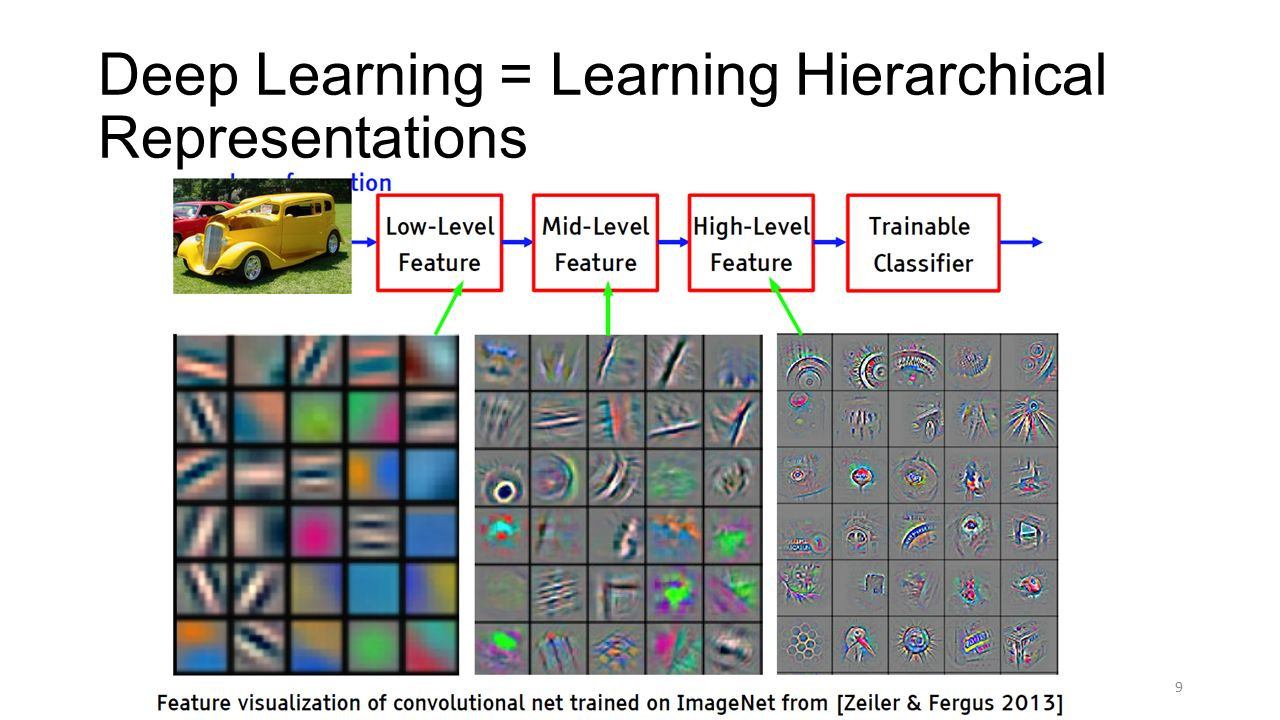

**connect google colab and google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Libraries**

In [107]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from skimage.transform import resize

# <font color='red'>**Loading train dataset**</font>


In [108]:
train_path = "/content/drive/MyDrive/semillero Bivl2ab 2021-1/data/csv files/train.csv"
train_df = pd.read_csv(train_path, header=None)
train_df.head()

0             1
0  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
1  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
2  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
3  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
4  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic

In [109]:
train_df.columns = ['path', 'label']
train_df.head()

path         label
0  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
1  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
2  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
3  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
4  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic

In [110]:
print("the length of data is: ", len(train_df))

the length of data is:  9840


**Manage the data on the fly**

In [111]:
train_ade = train_df.loc[train_df['label'] == 'adenoma'][0:333]
train_hip = train_df.loc[train_df['label'] == 'hiperplastic'][0:333]
train_ser = train_df.loc[train_df['label'] == 'serrated'][0:333]
train_2 = pd.concat([train_ade, train_hip, train_ser], axis=0)
train_2.head()

path    label
2624  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma
2625  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma
2626  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma
2627  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma
2628  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma

In [112]:
train_2["label"].value_counts()

hiperplastic    333
adenoma         333
serrated        333
Name: label, dtype: int64

**The generator object**

In [113]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., 
                                                          validation_split=0.1, 
                                                          rotation_range=40,
                                                          horizontal_flip=True,
                                                          fill_mode='reflect')

In [114]:
visual_generator = datagen.flow_from_dataframe(
    train_2,
    directory=None,
    subset = "training",
    x_col="path",
    y_col="label",
    batch_size=1,
    shuffle=True,
    target_size=(32,32)
)

Found 900 validated image filenames belonging to 3 classes.


What abour labels?

In [115]:
visual_generator.class_indices

{'adenoma': 0, 'hiperplastic': 1, 'serrated': 2}

In [116]:
labels={0: 'adenoma',
        1: 'hiperplastic',
        2: 'serrated'}

**Some visual examples...**

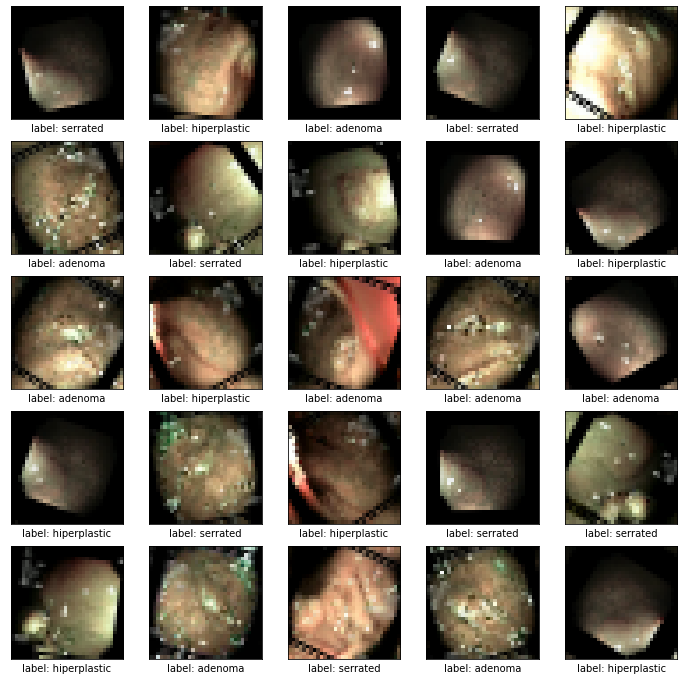

In [117]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.squeeze(next(visual_generator)[0]))#convert (batch, high, width, #channels) into (high, width, #channels) 
  plt.xlabel("label: {}".format(labels[np.argmax(next(visual_generator)[1])]))

**For training purposes...**

In [118]:
train_generator = datagen.flow_from_dataframe(
    train_2,
    directory=None,
    subset = "training",
    x_col="path",
    y_col="label",
    batch_size=16,
    shuffle=True,
    target_size=(32,32)
)

valid_generator = datagen.flow_from_dataframe(
    train_2,
    directory=None,
    subset = "validation",
    x_col="path",
    y_col="label",
    batch_size=16,
    shuffle=True,
    target_size=(32,32)    
)

Found 900 validated image filenames belonging to 3 classes.
Found 99 validated image filenames belonging to 3 classes.


# <font color='red'>**My first dense neural network (DNN)**</font>

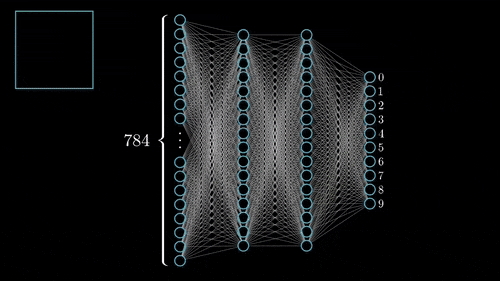

In [119]:
my_input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Flatten()(my_input)
x = keras.layers.Dense(units=1024, activation='relu')(x)
x = keras.layers.Dense(units=512, activation='relu')(x)
my_output = keras.layers.Dense(units=3, activation='softmax')(x)

my_dnn = keras.Model(my_input, my_output)

In [120]:
my_dnn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 1539      
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________


In [121]:
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
my_dnn.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [122]:
history = my_dnn.fit(train_generator, validation_data = valid_generator, epochs=10)

Epoch 1/10
57/57 [==============================] - 12s 205ms/step - loss: 0.7942 - accuracy: 0.7344 - val_loss: 1.1572 - val_accuracy: 0.1212
Epoch 2/10
57/57 [==============================] - 11s 199ms/step - loss: 0.4888 - accuracy: 0.8589 - val_loss: 0.9988 - val_accuracy: 0.4343
Epoch 3/10
57/57 [==============================] - 11s 200ms/step - loss: 0.3668 - accuracy: 0.9056 - val_loss: 1.5659 - val_accuracy: 0.2323
Epoch 4/10
57/57 [==============================] - 11s 200ms/step - loss: 0.3224 - accuracy: 0.9144 - val_loss: 0.9292 - val_accuracy: 0.6263
Epoch 5/10
57/57 [==============================] - 11s 199ms/step - loss: 0.3010 - accuracy: 0.9133 - val_loss: 0.6206 - val_accuracy: 0.7778
Epoch 6/10
57/57 [==============================] - 11s 200ms/step - loss: 0.2707 - accuracy: 0.9178 - val_loss: 0.9623 - val_accuracy: 0.6869
Epoch 7/10
57/57 [==============================] - 11s 201ms/step - loss: 0.2318 - accuracy: 0.9378 - val_loss: 0.7169 - val_accuracy: 0.7879

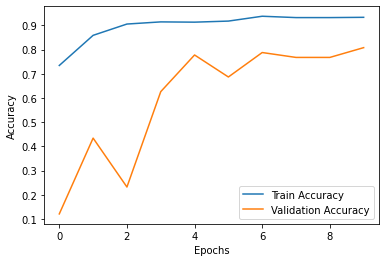

In [123]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#<font color='red'>**Let's test it!**</font>

**Loading test dataset...**

In [124]:
test_path = "/content/drive/MyDrive/semillero Bivl2ab 2021-1/data/csv files/test.csv"
test_df = pd.read_csv(test_path, header=None)
test_df.columns = ['path', 'label']
test_df.head()

path         label
0  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
1  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
2  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
3  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic
4  /content/drive/MyDrive/semillero Bivl2ab 2021-...  hiperplastic

In [125]:
test_ade = test_df.loc[test_df['label'] == 'adenoma'][0:100]
test_hip = test_df.loc[test_df['label'] == 'hiperplastic'][0:100]
test_ser = test_df.loc[test_df['label'] == 'serrated'][0:100]
test_2 = pd.concat([test_ade, test_hip, test_ser], axis=0)
test_2 = test_2.reset_index(drop=True)

In [126]:
test_2.head()

path    label
0  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma
1  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma
2  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma
3  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma
4  /content/drive/MyDrive/semillero Bivl2ab 2021-...  adenoma

In [127]:
test_2['label'].value_counts()

serrated        100
hiperplastic    100
adenoma         100
Name: label, dtype: int64

In [128]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [129]:
test_generator = datagen.flow_from_dataframe(
    test_2,
    directory=None,
    x_col="path",
    y_col="label",
    batch_size=8,
    shuffle=True,
    target_size=(32,32)
)

Found 300 validated image filenames belonging to 3 classes.


In [130]:
def model_evaluate(model, generator):
  test_loss, test_acc = model.evaluate(generator)
  print('Test accuracy:', test_acc)

In [131]:
model_evaluate(my_cnn,test_generator)

38/38 [==============================] - 3s 90ms/step - loss: 2.6318 - accuracy: 0.2333
Test accuracy: 0.23333333432674408


In [134]:
predictions = my_dnn.predict(test_generator)
print("predictions shape: ", predictions.shape)

predictions shape:  (300, 3)


**predicting one image...**

leyendo de:  /content/drive/MyDrive/semillero Bivl2ab 2021-1/data/images/test/hiperplastic/hiperplastic_NBI_video_11_img_73.png


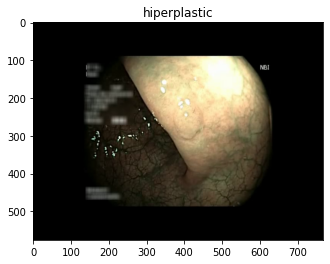

In [135]:
idx = 100
path_img = test_2['path'][idx]
print("leyendo de: ", path_img)
img = imageio.imread(path_img)
plt.title(test_df['label'][idx])
plt.imshow(img)

In [136]:
img = resize(img,((1,32,32,3)))
probs = my_dnn.predict(img)
print("pred: {} conf: {}".format(labels[np.argmax(probs)],"%0.2f"%np.max(probs)))

pred: serrated conf: 0.94


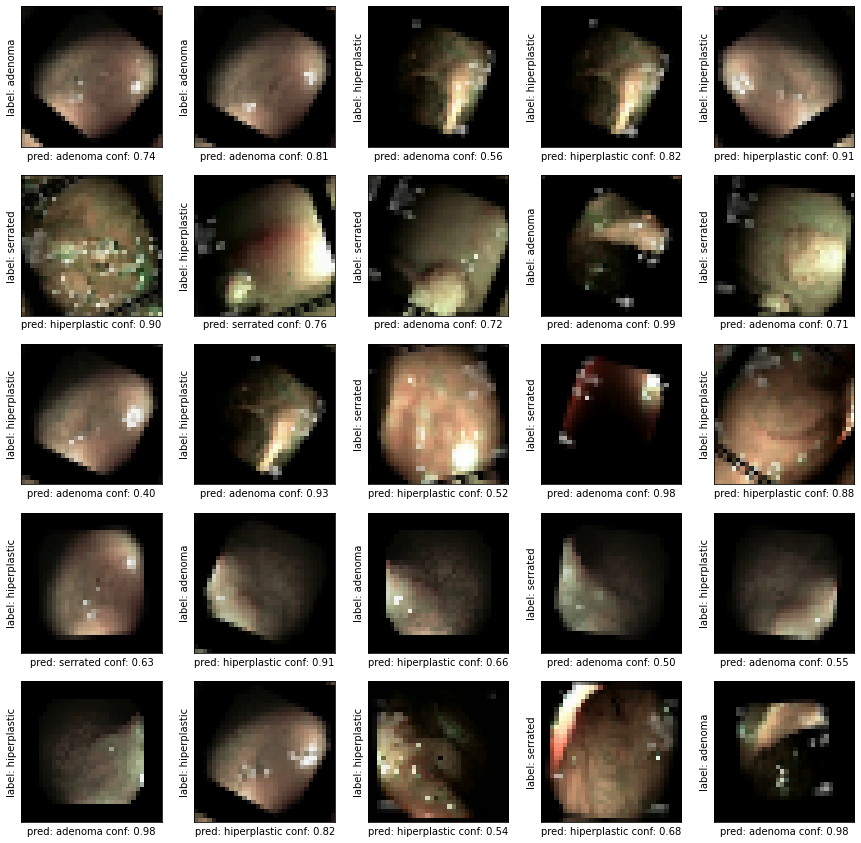

In [137]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.squeeze(next(visual_generator)[0]))#convert (batch, high, width, #channels) into (high, width, #channels) 
  plt.xlabel("pred: {} conf: {}".format(labels[np.argmax(predictions[i])],"%0.2f"%np.max(predictions[i])))
  plt.ylabel("label: {}".format(labels[np.argmax(next(visual_generator)[1])]))

<font color='purple'>**Student challenge**</font>
1. What happens if we add more neurons (units)?
2. If we add more dense layers?
3. How about mix the previous ideas?

# **We can do better!**

# **<font color='red'>Building our own CNN</font>**

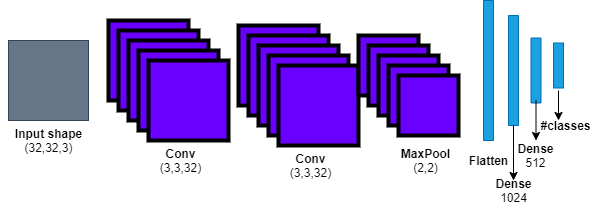

In [138]:
input_cnn = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_cnn)
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(units=1024, activation='relu')(x)
x = layers.Dense(units=512, activation='relu')(x)
output_cnn = layers.Dense(units=3, activation='softmax')(x)
my_cnn = keras.Model(input_cnn, output_cnn)

In [139]:
my_cnn.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               5248

#<font color='red'>**Training our network**</font>

In [140]:
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
my_cnn.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [141]:
history = my_cnn.fit(train_generator, validation_data = valid_generator, epochs=10)

Epoch 1/10
57/57 [==============================] - 12s 210ms/step - loss: 1.0296 - accuracy: 0.4867 - val_loss: 1.5245 - val_accuracy: 0.0000e+00
Epoch 2/10
57/57 [==============================] - 12s 209ms/step - loss: 0.7628 - accuracy: 0.7989 - val_loss: 1.6194 - val_accuracy: 0.0000e+00
Epoch 3/10
57/57 [==============================] - 12s 203ms/step - loss: 0.5079 - accuracy: 0.8111 - val_loss: 0.5520 - val_accuracy: 0.7980
Epoch 4/10
57/57 [==============================] - 12s 204ms/step - loss: 0.3707 - accuracy: 0.8722 - val_loss: 1.1807 - val_accuracy: 0.4747
Epoch 5/10
57/57 [==============================] - 12s 205ms/step - loss: 0.3008 - accuracy: 0.9000 - val_loss: 1.2254 - val_accuracy: 0.5253
Epoch 6/10
57/57 [==============================] - 12s 204ms/step - loss: 0.3606 - accuracy: 0.8656 - val_loss: 1.1148 - val_accuracy: 0.6061
Epoch 7/10
57/57 [==============================] - 12s 204ms/step - loss: 0.2865 - accuracy: 0.9178 - val_loss: 0.9336 - val_accuracy

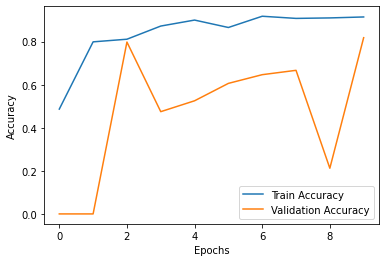

In [142]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#<font color='red'>**Let's test it!**</font>


In [143]:
model_evaluate(my_cnn, test_generator)

38/38 [==============================] - 3s 91ms/step - loss: 2.6139 - accuracy: 0.4500
Test accuracy: 0.44999998807907104


In [144]:
predictions = my_cnn.predict(test_generator)
print("predictions shape: ", predictions.shape)

predictions shape:  (300, 3)


leyendo de:  /content/drive/MyDrive/semillero Bivl2ab 2021-1/data/images/test/hiperplastic/hiperplastic_NBI_video_11_img_73.png


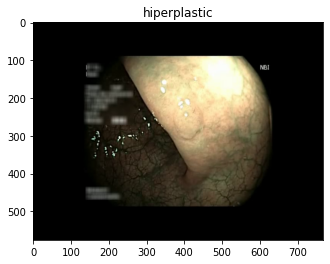

In [145]:
idx = 100
path_img = test_2['path'][idx]
print("leyendo de: ", path_img)
img = imageio.imread(path_img)
plt.title(test_df['label'][idx])
plt.imshow(img)

In [146]:
img = resize(img,((1,32,32,3)))
probs = my_cnn.predict(img)
print("pred: {} conf: {}".format(labels[np.argmax(probs)],"%0.2f"%np.max(probs)))

pred: serrated conf: 0.98


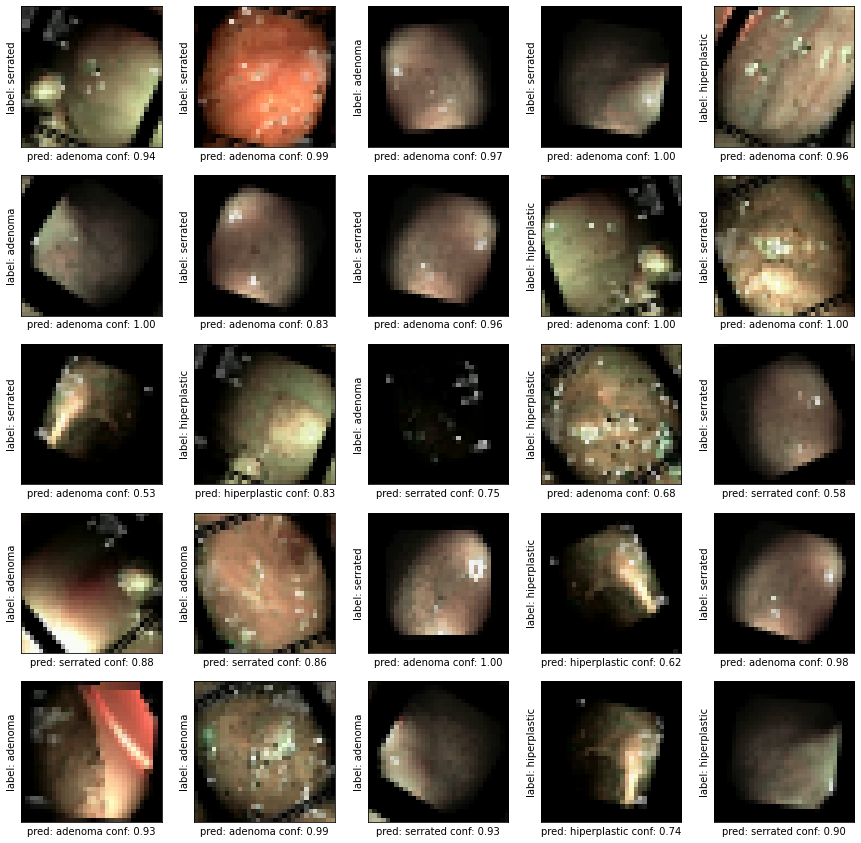

In [147]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.squeeze(next(visual_generator)[0]))#convert (batch, high, width, #channels) into (high, width, #channels) 
  plt.xlabel("pred: {} conf: {}".format(labels[np.argmax(predictions[i])],"%0.2f"%np.max(predictions[i])))
  plt.ylabel("label: {}".format(labels[np.argmax(next(visual_generator)[1])]))

<font color='purple'>**Student challenge**</font>
1. What happens if we add more filters?
2. If we add more convolutional layers?
3. If we make bigger filters?
4. How about mix the previous ideas?

## Referencias

[1.]   Understanding Convolutions for Deep Learning: /towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1 

[2.] Images filters in python: https://towardsdatascience.com/image-filters-in-python-26ee938e57d2

<img src="https://gitlab.com/bivl2ab/academico/macv/semillero-uis-2020-2/-/raw/master/img/thanks.jpg" style="width:700px;">

